URL to source code:
[code](https://github.com/pchoi7/pchoi7.github.io/tree/main/posts/Logistic-Regression)

### Logistic Regression Implementation

In order to implement the $\textit{fit}$ function, I used the equation for the gradient as follows:

$\nabla L(w) = \frac{1}{n} \sum_{i = 1}^{n}\nabla \ell (f_{w}(x_{i}), y_{i})$

This equation is the gradient for empirical risk for logistic regression. Using this equation, we can substitute it into $w^{(t +1)} \leftarrow w^{(t)} - \alpha \nabla L(w^{(t)})$ and choose our value of $\alpha$ until it converges.



For stochastic gradient descent, a similar equation to the $\textit{fit}$ function was used:

$\nabla_{S}L(w) = \frac{1}{|S|} \sum_{i \in S}\nabla \ell (f_{w}(x_{i}), y_{i})$

where $S \subseteq [n] = \{1,...,n\}$ and is called the batch size. 


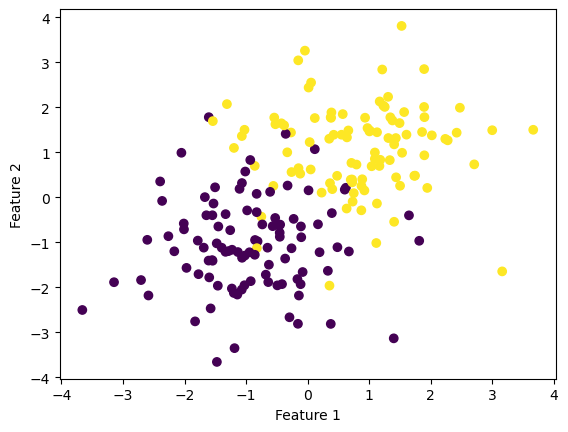

In [1]:
from logReg import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

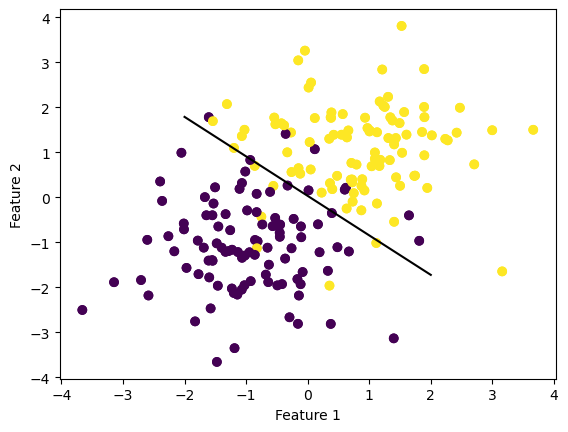

In [39]:
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

# inspect the fitted value of w
LR.w 

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Evolution of Loss Function for Gradient Descent and Stochastic Gradient Descent

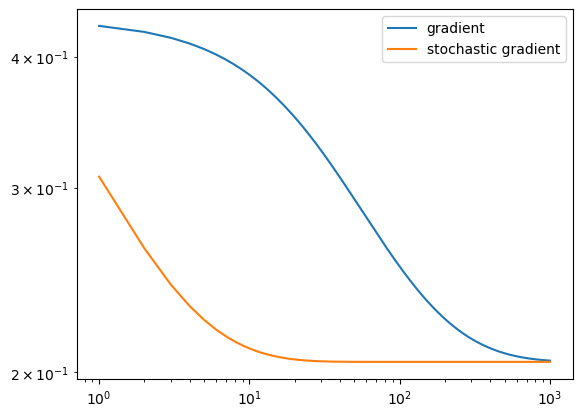

In [37]:
# GRADIENT
LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")


# STOCHASTIC GRADIENT
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000,  
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")


plt.loglog()

legend = plt.legend() 

### Experiment 1 (Large Learning rate $\alpha$)

In this experiment, I changed the values of the learning rate $\alpha$ to see which values fails to converge.

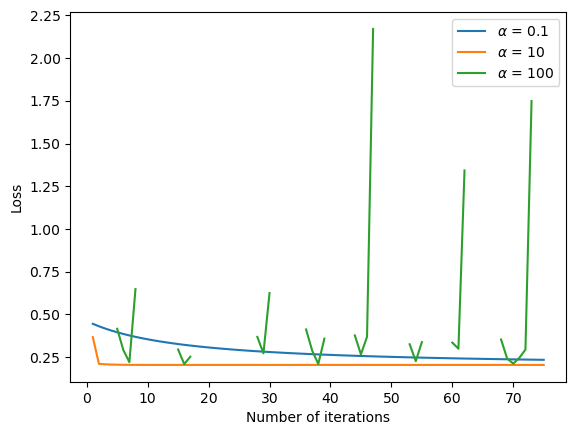

In [28]:
alpha_list = [0.1, 10, 100]  # list of learning rates to test

for i in range(len(alpha_list)):
    
    if i == 0:
        
        LR = LogisticRegression()
        LR.fit(X, y, alpha = alpha_list[i], max_epochs = 75)
    
        loss = len(LR.loss_history)
        plt.plot(np.arange(loss) + 1, LR.loss_history, label = r"$\alpha$ = 0.1")
    
    else:
           
        LR = LogisticRegression()
        LR.fit(X, y, alpha = alpha_list[i], max_epochs = 75)
    
        loss = len(LR.loss_history)
        plt.plot(np.arange(loss) + 1, LR.loss_history, label = r"$\alpha$ = %d"%alpha_list[i])
    

plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

The loss of a learning rate too high will not converge. In this case, I've used a learning rate of $\alpha = 100$, and the graph shows that for this value the loss does not converge.

### Experiment 2 (Changing Batch Size)

In this experiment, I am changing the batch size to see how it influences the convergence of the algorithm. This experiment uses the fit_stochastic function.

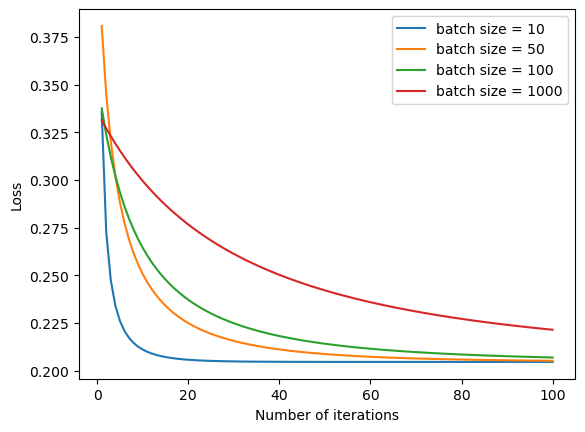

In [32]:
#LR = LogisticRegression()

batch_list = [10, 50, 100, 1000]  # list of batch sizes to test

for i in range(len(batch_list)):
    
    LR = LogisticRegression()
    LR.fit_stochastic(X, y, alpha = 0.1, batch_size = batch_list[i], max_epochs = 100)
    
    loss = len(LR.loss_history)
    plt.plot(np.arange(loss) + 1, LR.loss_history, label = "batch size = %d"%batch_list[i])
    
    
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

As shown in this graph, when the batch size is smaller, the algorithm converges faster.